# Electric Vehicle Data Analysis Using Python

Project Overview :
* This project focuses on analyzing a dataset related to electric vehicles (EVs) to uncover key insights into factors such as electric range, energy consumption, and pricing. Through exploratory data analysis, hypothesis testing, and statistical modeling, we aim to identify trends, correlations, and potential areas for improvement in EV performance and affordability. The findings will help provide actionable recommendations in the EV industry.

 ****

Importing all the libraries which we are using to perfom all tasks.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Exploring the Dataset

Before starting working on project I should
* Load and explore the data,
* Check for missing values, incorrect types, and inconsistencies,
* Understand the columns in the data.

In [8]:
# loading data

file_path = "FEV-data-Excel.xlsx"
fev_df = pd.read_excel(file_path)

#Understanding the structure and exploring data

fev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


In [9]:
fev_df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


# 

As we notice here, data types for each column are correct and there are not any inconsistencies except some missing values. So next step is to check missing values and replacing them in appropriate way.

In [15]:
#missing values per column

m_val = fev_df.isnull().sum()

#percentage of missing values per column

m_perc = (fev_df.isnull().sum() / len(fev_df)) * 100

m_summary = pd.DataFrame({'Missing Values': m_val, 'Percentage': m_perc})

m_summary[m_summary['Missing Values'] > 0]

,Missing Values,Percentage
Type of brakes,1,1.886792
Permissable gross weight [kg],8,15.094340
Maximum load capacity [kg],8,15.094340
Boot capacity (VDA) [l],1,1.886792
Acceleration 0-100 kph [s],3,5.660377
mean - Energy consumption [kWh/100 km],9,16.981132


In [17]:
#missing values per row

m_val_row = pd.DataFrame({"Manufracturer" : fev_df["Make"], "Missing values" : fev_df.isnull().sum(axis=1)})

#missing values per manufr.

m_val_rows = m_val_row.groupby("Manufracturer")["Missing values"].count().reset_index()

m_val_rows.sort_values(by = "Missing values", ascending = False).head()

,Manufracturer,Missing values
18,Tesla,7
0,Audi,6
7,Kia,4
14,Porsche,4
19,Volkswagen,4


Out of 25 columns, 3 columns have more than 15% of missing values and those missing values are not random. For example, Tesla has multiple missing rows. This could be due to specific data collection issues. And I personally think that filling it with imputed values from all EVs may not reflect reality. Because EV specifications are brand-specific and model-specific.

So considering that factor I prefer to replace missing values only for those columns which are to be used in specific tasks.

As the column "mean - Energy consumption [kWh/100 km]" is specifically used in our analysis, I am handling missing values for that column.

In [24]:
#Missing values by column - ""mean - Energy consumption [kWh/100 km"

mis_fev_df = fev_df[["Make", "mean - Energy consumption [kWh/100 km]"]].copy()

mis_fev_df.loc[:, "mis_val_count"] = mis_fev_df.isnull().sum(axis=1)

mval_by_manuf = mis_fev_df.groupby("Make")["mis_val_count"].sum().reset_index()

mval_by_manuf[mval_by_manuf["mis_val_count"] > 0]

,Make,mis_val_count
2,Citroën,1
13,Peugeot,1
18,Tesla,7


In [26]:
fev_df["mean - Energy consumption [kWh/100 km]"].describe()

count    44.000000
mean     18.994318
std       4.418253
min      13.100000
25%      15.600000
50%      17.050000
75%      23.500000
max      28.200000
Name: mean - Energy consumption [kWh/100 km], dtype: float64

The data in "mean - Energy consumption [kWh/100 km]" column is seems to be symmetrically distributed and considering the factor "EV specifications are brand-specific and model-specific" I am replacing missing values with average value.(prefering mean over median)

In [30]:
fev_df = fev_df.fillna({"mean - Energy consumption [kWh/100 km]":fev_df["mean - Energy consumption [kWh/100 km]"].mean()})

# 
# Task 1

A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.
 * Our task is to filter out EVs that meet these criteria.
 * Group them by the manufacturer (Make).
 * Calculate the average battery capacity for each manufacturer.

In [34]:
# Extracted vehicles meeting both criteria (≤ 350,000 PLN and ≥ 400 km range).

filt_evs = fev_df[(fev_df["Minimal price (gross) [PLN]"] <= 350000) & (fev_df["Range (WLTP) [km]"] >= 400)]

print("\nList of filtered out EVs that meets given criteria : \n")
filt_evs.head()


List of filtered out EVs that meets given criteria : 



,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70


# 
The selected EVs were grouped by manufacturer to observe which brands offer cars within the required specifications.

In [37]:
grouped_evs = filt_evs.groupby("Make")["Model"].count().reset_index()
grouped_evs.rename(columns = {"Model" : "Count of EVs"}, inplace = True)

print("\nCount of cars by manufracturer is : \n")
grouped_evs


Count of cars by manufracturer is : 



,Make,Count of EVs
0,Audi,1
1,BMW,1
2,Hyundai,1
3,Kia,2
4,Mercedes-Benz,1
5,Tesla,3
6,Volkswagen,3


# 
For each manufacturer, I computed the average battery capacity of the filtered EVs.

In [40]:
avg_battery = filt_evs.groupby("Make")["Battery capacity [kWh]"].mean().reset_index()
avg_battery.rename(columns = {"Battery capacity [kWh]" : "Avg. Battery capacity [kWh]"}, inplace = True)

print("\nThe average battery capacity for each manufacturer : \n")
avg_battery


The average battery capacity for each manufacturer : 



,Make,Avg. Battery capacity [kWh]
0,Audi,95.000000
1,BMW,80.000000
2,Hyundai,64.000000
3,Kia,64.000000
4,Mercedes-Benz,80.000000
5,Tesla,68.000000
6,Volkswagen,70.666667


# 
**Conclusion**
 * Some manufacturers offer multiple EVs within the given budget and range, while others do not.
 * Audi best battery capacity on an average of 95kWh followed by BMW and Mercedes-Benz but Hyundai and Kia both these manufracturer lacks this feature's sufficiency.
 * This analysis helps the customer make decisions about which manufacturers provide suitable EVs.

# 

# Task 2

You suspect some EVs have unusually high or low energy consumption.
* Find the outliers in the mean- Energy consumption [kWh/100 km] column.(16 Marks)

To perform this task I will use both the methods of outlier detection which are Standard deviation method and IQR method.

In [47]:
#Using 3-Standard Deviations

col = "mean - Energy consumption [kWh/100 km]"
mean = np.mean(fev_df[col])
stdev = np.std(fev_df[col])

upper_bound = mean + (3*stdev)
lower_bound = mean - (3*stdev)

outliers = fev_df[(fev_df[col] < lower_bound) | (fev_df[col] > upper_bound)]

In [49]:
print(f"\nNumber of outliers in 'mean - Energy consumption [kWh/100 km]' column : {len(outliers)} \n")
outliers


Number of outliers in 'mean - Energy consumption [kWh/100 km]' column : 0 



,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]


In [52]:
# Using IQR method

q1 = fev_df[col].quantile(0.25)
q3 = fev_df[col].quantile(0.75)

# Interquartile Range (IQR)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = fev_df[(fev_df[col] < lower_bound) | (fev_df[col] > upper_bound)]

In [54]:
print(f"\nNumber of outliers in 'mean - Energy consumption [kWh/100 km]' column : {len(outliers)} \n")
outliers


Number of outliers in 'mean - Energy consumption [kWh/100 km]' column : 0 



,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]


# 
**Task 2 Findings**
 * After applying both statistical methods no outliers were detected in the Mean Energy Consumption (kWh/100 km) column.
 * This suggests that all EVs in the dataset have relatively consistent energy consumption values, meaning no extreme values exist.

**Conclusions**
 * The absence of outliers shows normal efficiency levels for EVs in the dataset.
 * EV manufacturers may have similar battery technology system, leading to standard energy consumption values.

# Task 3

Our manager wants to know if there's a strong relationship between battery capacity and range.
 * Create a suitable plot to visualize.(8 Marks)
 * Highlight any insights.(8 Marks)

**Ideology**
 * To perform this task, we can use scatter plot or regression plot as we are comparing only two variables. Regression plot would be a better choice which allows us to show a trend line on plot. It will help us visualize the type of relationship effectively.
 * The regression plot will tell us only the direction of relation and to show the strength of that relation I am using correlation coefficient.

**methodology**
 * I have created regression plot using Seaborn and Matplotlib libraries.
 * The x-axis represents battery capacity, while the y-axis represents range.
 * Using corr() function, the correlation coefficient is calculated to show the strength.


Correlation between Battery Capacity and Range: 0.81 



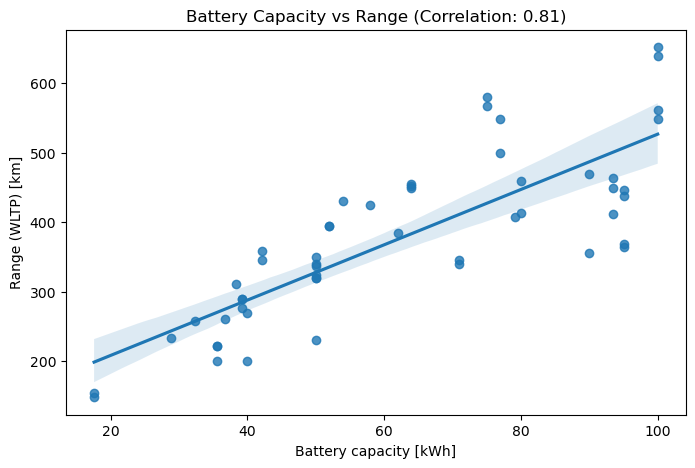

In [62]:
col1 = "Battery capacity [kWh]"
col2 = "Range (WLTP) [km]"
relat_df = fev_df[[col1, col2]]


correlation = relat_df.corr().iloc[0, 1]
print(f"\nCorrelation between Battery Capacity and Range: {correlation:.2f} \n")


plt.figure(figsize=(8, 5))
sns.regplot(x=relat_df[col1], y=relat_df[col2])
plt.title(f"Battery Capacity vs Range (Correlation: {correlation:.2f})")
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

**Task 3 Findings :**
 * The scatter plot visualizes the relationship between Battery Capacity (kWh) and Range (WLTP) [km]
 * From the graph and the trendline we can notice a positive relation.
 * The correlation coefficient of 0.81 suggests a strong linear relationship between battery capacity and range.
 * Some data points are deviated from that line so it could be due to some factors beyond battery capacity. And for higher battery capacity we can notice more variation.

**Conclusions**
 * As battery capacity increases, the driving range tends to increase as well.
 * Battery capacity is a major determinant of driving range, but there might be more factors.
 * Buyers should consider both capacity and efficiency rather than assuming that a larger battery always gives a longer range.

# 

# Task 4

Build an EV recommendation class.
* The class should allow users to input their budget, desired range, and battery capacity.
* The class should then return the top three EVs matching their criteria.

**Ideology**
 * I wanted to create a dynamic but user freindly class which can take specified inputs without prior knowledge of functions arguments. (like we don't need to give parameters in those functions).
 * If user want a list of EVs based on only specific feature or single criterion (ex. only condition is battery capacity) then there should be such specific filtering functions.
 * Some users would require a function which can filter list based on all three conditions so There should be a function taking all three inputs from user and give list of EVs.
 * If user uses all criteria then it will filter EVs with maximum battery capacity and max range under given budget.

**Methodology**
 * I have created a class accessing data with list of EVs and defined four functions using which we can filter list of EVs.
 * I have explicitly used input functions for all function so that calling a function doesnt require any arguments(parameters in it).
 * I have provided input range for each function so can user directly give inputs knowing the range.
 * Error handling is important in case if user enters non numerical value. Therefore try-except code blocks are used.
 * For sorting and filtering the list, appropriate functions are used.

In [69]:
class ev_list:
    
    def __init__(self, df):
        print("\nWelcome to EV recommendation system !\n",
              "\nUse 'budget(), desired_range(), battery_capacity()' functions for specific recommendations",
              "\nYou can also use 'recomm()' to check personilized list of EVs based on all conditions")
        self.df = df

    
    def budget(self):

        min_bg = self.df["Minimal price (gross) [PLN]"].min()
        max_bg = self.df["Minimal price (gross) [PLN]"].max()

        print(f"\nThe budget range is from {min_bg:,} PLN to {max_bg:,} PLN.\n")

        try:
            x = int(input("Enter your budget"))
            ev_list = self.df[self.df["Minimal price (gross) [PLN]"] <= x]
            top_evs = ev_list.sort_values(by = "Minimal price (gross) [PLN]", ascending = False)
            return top_evs.head(3)
            
        except ValueError:
            print("Please enter a valid number for the budget !")
            return None

    
    def desired_range(self):

        min_dr = self.df["Range (WLTP) [km]"].min()
        max_dr = self.df["Range (WLTP) [km]"].max()

        print(f"\n Estimated driving range is from {min_dr:,} km to {max_dr:,} km.\n")

        try:
            y = int(input("Enter your desired range"))
            ev_list = self.df[self.df["Range (WLTP) [km]"] <= y]
            top_evs = ev_list.sort_values(by = "Range (WLTP) [km]", ascending = False)
            return top_evs.head(3)
        except ValueError:
            print("Please enter a valid number for the desired range !")
            return None

    
    def battery_capacity(self):

        min_bc = self.df["Battery capacity [kWh]"].min()
        max_bc = self.df["Battery capacity [kWh]"].max()

        print(f"\n Battery capacity range is from {min_bc:,} kWh to {max_bc:,} kWh.\n")

        try:
            z = int(input("What battery capacity do you want ?"))
            ev_list = self.df[self.df["Battery capacity [kWh]"] <= z]
            top_evs = ev_list.sort_values(by = "Battery capacity [kWh]", ascending = False)
            return top_evs.head(3)
        except ValueError:
            print("Please enter a valid number for the battery capacity !")
            return None
            
        
    def recomm(self):
        bg = int(input("Give your maximum budget"))
        dr = int(input("Give your minimum desired range"))
        bc = int(input("Give your minimum battery capacity"))

        try:
            evs_list = self.df[(self.df ["Minimal price (gross) [PLN]"] <= bg)
            & (self.df["Range (WLTP) [km]"] >= dr)
            & (self.df["Battery capacity [kWh]"] >= bc)]

            top_evs = evs_list.sort_values(by = ["Range (WLTP) [km]","Battery capacity [kWh]"], ascending = False)
            return top_evs.head(3)

        except ValueError:
            print("Please enter valid inputs !")
            return None

In [71]:
# Using a class and creating object with providing EVs data
evs = ev_list(fev_df)


Welcome to EV recommendation system !
 
Use 'budget(), desired_range(), battery_capacity()' functions for specific recommendations 
You can also use 'recomm()' to check personilized list of EVs based on all conditions


In [73]:
evs.budget()


The budget range is from 82,050 PLN to 794,000 PLN.



Enter your budget 632000


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
45,Tesla Model X Performance,Tesla,Model X Performance,482990,772,1140,disc (front + rear),4WD,100.0,548,...,NaN,NaN,7,5,20,261,857.0,2.8,150,18.994318
31,Porsche Taycan 4S (Performance Plus),Porsche,Taycan 4S (Performance Plus),482283,490,650,disc (front + rear),4WD,93.4,463,...,2880.0,660.0,4,4,19,250,488.0,4.0,270,24.100000
30,Porsche Taycan 4S (Performance),Porsche,Taycan 4S (Performance),457000,435,640,disc (front + rear),4WD,79.2,407,...,2880.0,740.0,4,4,19,250,488.0,4.0,225,23.400000


In [75]:
evs.recomm()

Give your maximum budget 580300
Give your minimum desired range 560
Give your minimum battery capacity 85


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
42,Tesla Model S Long Range Plus,Tesla,Model S Long Range Plus,368990,525,755,disc (front + rear),4WD,100.0,652,...,NaN,NaN,5,5,19,250,745.0,3.8,150,18.994318
43,Tesla Model S Performance,Tesla,Model S Performance,443990,772,1140,disc (front + rear),4WD,100.0,639,...,NaN,NaN,5,5,21,261,745.0,2.5,150,18.994318
44,Tesla Model X Long Range Plus,Tesla,Model X Long Range Plus,407990,525,755,disc (front + rear),4WD,100.0,561,...,NaN,NaN,7,5,20,250,857.0,4.6,150,18.994318


# 
**Conclusions**
 * This recommendation system personalizes EV suggestions based on individual requirements.
 * Users can quickly find the best-suited EVs without manually searching through large datasets. It will work even if the given data file gets updated.
 * The filtering preference is given as : maximum battery capacity and maximum desired range under minimum budget. The approach can be updated by including additional parameters.

# Task 5
 Inferential Statistics– Hypothesis Testing & Conclusion:
 * Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading
 manufacturers i.e. Tesla and Audi.
 * What insights can you draw from the test results?
 * Provide actionable insights based on your analysis.
 (Conduct a two sample t-test using ttest_ind from scipy.stats module)

We are instructed to test if there is a significant difference between the average engine power of Tesla and Audi cars.
To test this hypothesis we chose the sample from fev_df data and the sample size (n) is 13 records (n < 30) hence the T-Test of independence is appropriate.


Hence Conducted a Two-Sample T-Test using ttest_ind from scipy.stats library and analyzed the p-value.

 ****

**Hypothesis for the test :**
 * Null hypothesis : There is no significant difference between the average engine power of Tesla and Audi cars.

   *H0: μ1 = μ2*
   
 * Alternate hypothesis : There is a significant difference between the average engine power of Tesla and Audi cars.

   *H1: μ1≠ μ2*

   where µ1 and µ2 are the means for group 1 (Tesla) and group 2 (Audi), respectively.

**Level of Significance (alpha)**
 * We assume level of significance of 5% that is α = 0.05 for this test.
 * If P-value of this test is less than 0.05 (α) then we reject the null hypothesis otherwise we fail to reject the null hypothesis.

In [84]:
alpha = 0.05

Tesla = fev_df[fev_df["Make"] == "Tesla"]["Engine power [KM]"]
Audi = fev_df[fev_df["Make"] == "Audi"]["Engine power [KM]"]

t_stat, p_value = stats.ttest_ind(Tesla, Audi)

print(f"\nThe calculated T-Statistic is : {t_stat:.4f}\nThe P-Value for this test is: {p_value:.4f}")

if p_value >= alpha:
    print(f"\nAs the P-value ({p_value:.4f}) >= α ({alpha}),")
    print("We failed to reject the null hypothesis.\n")
else:
    print(f"\nAs the P-value ({p_value:.4f}) < α ({alpha}),")
    print("We reject the null hypothesis.")


The calculated T-Statistic is : 1.7024
The P-Value for this test is: 0.1167

As the P-value (0.1167) >= α (0.05),
We failed to reject the null hypothesis.



**Decision and Conclusions**

We conducted a two-sample t-test to compare the average engine power (KM) of Tesla and Audi.

Since P-value is greater than our chosen significance level α = 0.05, we failed to reject the null hypothesis, and conclude that the average engine power of Tesla and Audi is not significantly different.

Based on the results, we can state the following:

 * It suggests both brands offer similar engine power levels, meaning power alone is not a key factor which differes in features for both car categories.
 * Both brands provide comparable engine power levels, so customer may get confused and it would be better to consider other factors like acceleration, battery efficiency over engine power.

# 
# Overall Conclusion

This project successfully analyzed key aspects of electric vehicle data, helping consumers make better purchasing decisions. The insights provided are useful for:

 * Consumers looking for best EV choices.

 * Manufacturers aiming to improve battery efficiency and energy consumption.

 * Researchers exploring trends in EV performance.

# 
# Video Presentation Link:

https://drive.google.com/file/d/187K9KN_gEcHQDgCIX8LFbnRH1cgEbjMc/view?usp=sharing